# Линейная алгебра

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Векторы и векторные операции

### Общее

In [42]:
df = pd.DataFrame([1,7,3])
df[0].values # Преобразование DataFrame к вектору

array([1, 7, 3])

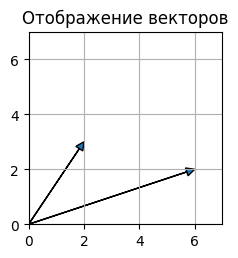

In [54]:
vector1 = np.array([2, 3])
vector2 = np.array([6, 2])
plt.figure(figsize=(2.5, 2.5)) # Размер окошка
plt.axis([0,7,0,7])
plt.arrow(0, 0, vector1[0], vector1[1], head_width=0.3, head_length=0.3, length_includes_head=True)
plt.arrow(0, 0, vector2[0], vector2[1], head_width=0.3, head_length=0.3, length_includes_head=True) 
plt.title('Отображение векторов')
plt.grid(True)
plt.show()


### Cложение, вычитание и другие операции над векторами 

**Вектора можно складывать и вычитать, если они одного размера** 

In [55]:
vector1 = np.array([2,3])
vector2 = np.array([5,4])
vector2 - vector1 # array([3, 1])
vector2 + vector1 # array([7, 7])
vector2 * vector1 # array([10, 12])
vector2 / vector1 # array([2.5, 1.33333333])
vector2 @ vector1 # 22 
vector1 + 2 # array([4, 5])
vector1 * 2 # array([4, 6])
vector1 / 2 # array([1. , 1.5])
vector1 - 2 # array([0, 1])
vector1**2 # array([4, 9])
vector1.mean() # 2.5


array([4, 9])

### Векторизованные функции

Масштабирование методом минимума максимума
$$ f(x) = \dfrac{x-\min{}}{\max{}-\min{}}$$

In [62]:
values = np.array([-20, 0, 0.5, 80, -1])
def min_max_val(values: np.ndarray):
    return (values - values.min()) / (values.max()-values.min())
min_max_val(values)

array([0.   , 0.2  , 0.205, 1.   , 0.19 ])

Иногда бывает, что значения могут быть очень большими. В таких случаях применяют **Логистическое преобразование**
$$ f(x) = \dfrac{1}{1+\exp{(-x)}}$$

In [72]:
def logistic_function(values):
    return 1 / ( 1 + np.exp(-values))
logistic_function(values)

array([2.06115362e-09, 5.00000000e-01, 6.22459331e-01, 1.00000000e+00,
       2.68941421e-01])

### Векторизация метрик

In [73]:
target = np.array([0.9, 1.2, 1.4, 1.5, 1.9, 2.0])
predictions = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]) 

Например средний квадрат отклонения (MSE):
$$ MSE = \dfrac{1}{n} \sum_{i=1}^{n}(target_i - prediction_i)^2$$ 
Где:
- $n$ длина каждого массива
- $\sum$ суммирование по всем объектам выборки

In [76]:
((target-predictions)**2).mean()

0.0049999999999999975

## Расстояние между векторами

Скалярное произведение
$$(a,b) = x_1y_1 + x_2y_2 + ... + x_ny_n$$
Расстояние на плоскости
$$ |a| = \sqrt{(a,a)} = \sqrt{x^2+y^2}$$
**Евклидово расстояние** (Индекс 2 означает, что координаты вектора возводятся во вторую степень) 
$$d_2(a,b)$$ 
Расстояние между векторами a = (x_1,y_1) и b = (x_2, y_2) вычисляются по формуле:
$$d_2(a, b) = \sqrt{(a-b,a-b)} = \sqrt{(x_1-x_2)^2 + (y_1 - y_2)^2}$$
**Манхэттенское расстояние** - сумма модулей разностей координат  
Допустим есть вектора $a = (x_1, y_1)$ и $b=(x_2,y_2)$, тогда расстояние:
$$d_1(a,b) = |x_2-x_1| + |y_2-y_1| $$ 
**Расстояние в многомерном пространстве**  
Евклидово: 
$$ d_2(a,b) = \sqrt{(b_1-a_1)^2+...+(b_n - a_n)^2} = \sqrt{\sum_{i=1}^{n}(b_i - a_i)^2} $$
Манхетонское:  
$$ d_1(a,b) = |b_1 - a_1| + |b_2-a_2|+ ... + |b_n - a_n| = \sum_{i=1}^{n}|b_i-a_i| $$ 

In [83]:
volume = np.array([0.1, 0.3, 0.1])
content = np.array([0.4, 0.0, 0.1]) 
sum(content * volume)
content @ volume # Скалярное произведение

0.05000000000000001

In [103]:
from scipy.spatial import distance 
a = np.array([5,6])
b = np.array([1,3])
np.dot(a - b, a - b)**0.5 # Евклидово расстояние
( (a - b) @ (a - b) )**0.5 # Евклидово расстояние
distance.euclidean(a, b) # Евклидово расстояние 
abs(a - b).sum() # Манхетонское расстояние
distance.cityblock(a, b) # Манхетонское расстояние

7

### Метод ближайщего соседа

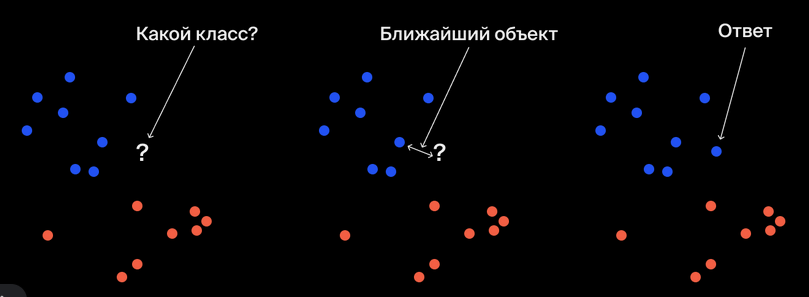

## Матрицы и матричные операции

матрицы обычно обозначаются загравными буквами
$a_{ij}$ - элемент в i строке и j столбце
$$ A = \begin{pmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}
\end{pmatrix} = 
\begin{pmatrix}
1 & 2 & 3\\
2 & 3 & 4
\end{pmatrix}$$

In [117]:
matrix = np.matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
matrix.shape # Размер матрицы (3, 3)
matrix[1,1] # 5
matrix[0,:] # Строка 0
matrix[:,1] # Столбец 1

(3, 3)

In [127]:
m1 = np.matrix([
    [1,1],
    [1,1]
])
m2 = np.matrix([
    [2,3],
    [4,5]
])
m1 + m2 # matrix([[3, 4],[5, 6]])
m1 - m2 # matrix([[-1, -2],[-3, -4]])
m1 * 2 # matrix([[2, 2], [2, 2]])
m1 - 2 # matrix([[-1, -1], [-1, -1]])
m1 / 2 # matrix([[0.5, 0.5], [0.5, 0.5]])
m1 + 2 # matrix([[3, 3], [3, 3]])


matrix([[3, 3],
        [3, 3]])

### Умножение матрицы на вектор

При умножение матрицы на вектор получается **вектор**!
Пример: матрица $A$ размера $m*n$ умножаем на вектор $b$ ($n$ мерный). Произведением будет новый вектор с = Ab, это m-мерный вектор, у которго i-я координата равна скалярному произведению. i-й строки матрицы на $b$

$$ \begin{pmatrix}
a_{11} & a_{12} & ... & a_{1n}\\
a_{21} & a_{22} & ... & a_{2n}\\
...    & ...    & ... & ...   \\
a_{m1} & a_{m2} & ... & a_{mn}\end{pmatrix} = 
\begin{pmatrix} b_1\\ b_2\\ ... \\ b_n \end{pmatrix} = 
\begin{pmatrix} c_1\\ c_2\\ ... \\ c_m \end{pmatrix} $$
Транспонирование матрицы:   
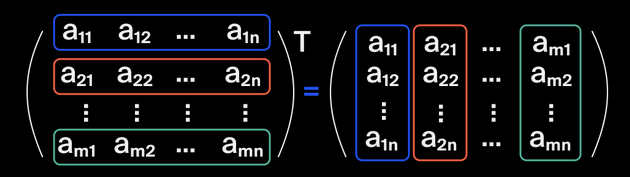

In [148]:
A = np.matrix([
    [1,2,3],
    [2,3,4],
    [3,4,5],
    [4,5,6]
])
vec = np.array([7,7,7])
h = []
for i in A:
    h.append(i @ vec) 

### Матричное умножение 

При матричном умножении третья матрица получаеться путем скалярных произведений строк первой матрицы на столбцы второй матрицы.
например:  
$$ A(m*n) * B(n*r) = C(m*r)$$ 
отдельно элемент $$C_{ij} = (A_i,B_j)$$
Логично: умножение возможно, если ширина первой матрицы равна высоте второй матрицы


## Модель линейной регрессии изнутри

У линейной регрессии - признаки это вектор чисел в n-мерном пространстве (допустим $x$). Предсказания модели $a$ вычисляются так: скалярно умножается вектор признаков на  вектор весов (w). Затем к этому произведению прибавляется величина сдвига предсказания
$$ a = (x, w) + w_0 $$ 
- вектор $w$ и $w_0$ - это параметры модели. В векторе $w$ параметров $n$, а в $w_0$ - один. То есть количество параметров больше длины вектора признаков на единицу.
- Если длина вектора признаков равна единице, то в выборке всего один признак. Изобразим этот признак с ответами на графике.
Графики предсказания для линейной регрессии задаются уравнением: 
$$ y = wx + w_0 $$ 

### Задача обучения

**Задачу обучения**: найти параметры модели, при которых значение функции потерь (_loss function_) на обучающей выборке минимально.   
в векторном виде: 
$$ a = Xw + w_0 $$ 
$X$ - обучающая выборка   
Для сокращения записи изменим обозначения. в матрицу X добавим столбец состоящий из 1(нулевой) а параметр w_0 к вектору w
$$ \begin{pmatrix}
x_{11} & x_{12} & ... & x_{1n}\\
x_{21} & x_{22} & ... & x_{2n}\\
...    & ...    & ... &  ... \end{pmatrix} \rightarrow 
\begin{pmatrix}
1   & x_{11} & x_{12} & ... & x_{1n}\\
1   & x_{21} & x_{22} & ... & x_{2n}\\
... & ...    & ...    & ... &  ... \end{pmatrix} $$
$$ (w_1,w_2,...,w_n) \rightarrow (w_0, w_1, w_2, ... , w_n) $$
Затем умножим матрицу $X$ на вектор $w$.. 
$$ a = Xw $$ 
Введем новое обозначение $y$ - вектор значений целевого признака для обучающей выборки.   
Запишем формулой задачу обучения линейной регресии для функции потерь `MSE`: 
$$ w = arg \min_{w} MSE(Xw, y) $$ 
Функция `argmin()` находит минимум и возвращает, при каком аргументе он был достигнут.  

### Обратная и единичная матрица

Единачная матрица $E$ = квадратная матрица, на главной диагонали которой стоят единицы, а остальные элементы - нули. 
$$ E = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} $$ 
Если любую матрицу умножить на единичную матрицу: получиться такая же матрица
$$ AE = EA = A $$ 
Обратная матрица - матрица $A$ с верхнем индексом $^{-1}$ произведение которой на A равно единичной матрице.
$$ AA^{-1} = A^{-1}A = E $$
Квадратные матрицы для которых можно найти обратные: называются обратными. Но не у каждой матрицы есть обратная.

In [8]:
A = np.matrix([
    [1,0,2],
    [2,1,2],
    [2,0,1]
])
np.linalg.inv(A) # Найти обратную матрицу

matrix([[-0.33333333,  0.        ,  0.66666667],
        [-0.66666667,  1.        , -0.66666667],
        [ 0.66666667,  0.        , -0.33333333]])

### Обучение линейной регрессии

Задача линейной регрессии такая: 
$$ w = arg \min_{w} MSE(Xw, y) $$ 
Минимальное значение MSE получается, когда веса равны этой величине
$$ w = (X^TX)^{-1}X^Ty $$